<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 5 – Sentiment Analysis</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform sentiment analysis on textual data..**



**Guidelines**
* Download `Reviews.csv` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file named `Lab5.ipynb` and submit to D2L `Lab 5 – Sentiment Analysis (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

### Question 1: Read the content of the `Reviews.csv` into a dataframe called `reviews_df` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `text` field content by performing the necessary steps to make it ready for applying sentiment analysis. Append the resulted preprocessed text to the `reviews_df` as a new column called `preprocessed_review`.

> **Q1.2.** Using nltk's `SentimentIntensityAnalyzer` module, get the `neg`, `neu`, `pos`, and `compound` scores of the `preprocessed_review` field and append the result to the `reviews_df` as new 4 columns-`neg`, `neu`, `pos`, and `compound`, respectively. 


> **Q1.3.** Label each review in the `reviews_df` as either `pos` or `neg` based on the `compound` value for that specific review, and append the result to the dataframe as new column called `comp_score`. If the value of `compound` is greater than or equals to `zero`, then the `comp_score = 'pos'` and `'neg'` otherwise. 

***After performing the first 3 parts, your dataframe should look like the following:***

|Id|neg|neu|pos|compound|comp_score|ProductId|ProfileName|Score|Summary|Text|preprocessed_review
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|1|0.000|0.695|0.305|0.9441|pos|A3SGXH7AUHU8GW|delmartian|5|Good Quality Dog Food|I have bought several of the Vitality canned d...|I have bought several of the Vitality canned d...|
|2|0.079|0.853|0.068|-0.1027|neg|A1D87F6ZCVE5NK|dll pa|1|Not as Advertised|Product arrived labeled as Jumbo Salted Peanut...|Product arrived labeled as Jumbo Salted Peanut...|
|3|0.091|0.754|0.155|0.8265|pos|ABXLMWJIXXAIN|Natalia Corres "Natalia Corres"|4|"Delight" says it all|This is a confection that has been around a fe...|This is a confection that has been around a fe...|

> **Q1.4.** Using seaborn's `barplot`, plot the actual score of the review (The Score column of the dataframe) against the pos, neu, neg, and compound values. You should generate 4 plots for the for values against the actual score. The documentation for the seaborn barplot module can be found here  &rarr; [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)


> **Q1.5.** Based on the plots generated in `Q1.4`, discuss the results of the analysis. 

In [27]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [28]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
df.head()

(568452, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
    
def preprocessor(text):
    
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text



In [30]:
df['preprocessed_review'] = df['Text'].apply(preprocessor)


In [31]:
df.head(5)
# show first 5 rows 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

res = {}
for index,data in df.iterrows():
    text = data['preprocessed_review']
    id= data['Id']
    res[id]=sia.polarity_scores(text)

In [34]:
res

{1: {'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9413},
 2: {'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'compound': -0.1027},
 3: {'neg': 0.132, 'neu': 0.576, 'pos': 0.292, 'compound': 0.8624},
 4: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404},
 5: {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'compound': 0.9468},
 6: {'neg': 0.045, 'neu': 0.652, 'pos': 0.303, 'compound': 0.9136},
 7: {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9463},
 8: {'neg': 0.0, 'neu': 0.287, 'pos': 0.713, 'compound': 0.9313},
 9: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176},
 11: {'neg': 0.03, 'neu': 0.756, 'pos': 0.215, 'compound': 0.9528},
 12: {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.6486},
 13: {'neg': 0.055, 'neu': 0.864, 'pos': 0.082, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.205, 'pos': 0.795, 'compound': 0.9382},
 15: {'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'compound': 0.

In [35]:
vaders = pd.DataFrame(res).T
vaders['comp_score']=['pos' if vader>=0 else 'neg' for vader in vaders['compound']]
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders



,Id,neg,neu,pos,compound,comp_score
0,1,0.000,0.503,0.497,0.9413,pos
1,2,0.129,0.762,0.110,-0.1027,neg
2,3,0.132,0.576,0.292,0.8624,pos
3,4,0.000,0.854,0.146,0.4404,pos
4,5,0.000,0.369,0.631,0.9468,pos
...,...,...,...,...,...,...
568447,568450,0.000,0.420,0.580,0.9300,pos
568448,568451,0.329,0.535,0.135,-0.7841,neg
568449,568452,0.000,0.743,0.257,0.8860,pos
568450,568453,0.059,0.243,0.697,0.9738,pos


In [36]:
vaders = vaders.merge(df, how='left')
vaders.head(5)
# show first 5 rows to compare with the expected results and confirm

,Id,neg,neu,pos,compound,comp_score,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,0.000,0.503,0.497,0.9413,pos,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,0.129,0.762,0.110,-0.1027,neg,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,0.132,0.576,0.292,0.8624,pos,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,0.000,0.854,0.146,0.4404,pos,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,0.000,0.369,0.631,0.9468,pos,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [37]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'comp_score', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'preprocessed_review'],
      dtype='object')

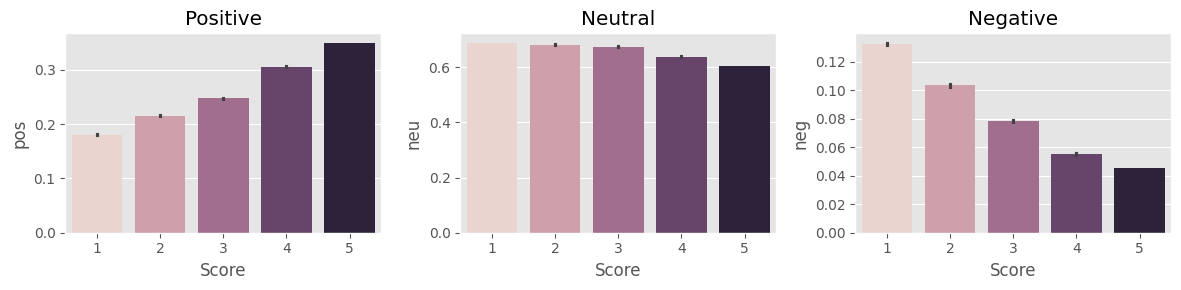

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], hue='Score', legend=False)
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], hue='Score', legend=False)
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], hue='Score', legend=False)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

The distribution of neutral, negative, and positive sentiment shown on the chart across the user review scores.
Positive Sentiment Chart: The percentage of positive sentiment tends to rise in tandem with the review score. This suggests that evaluations with higher ratings are more likely to be positive.
Negative Sentiment Chart: On the other hand, when review scores rise, the percentage of negative sentiment falls. This implies that evaluations with lower ratings are more likely to be critical.
Neutral Sentiment Chart: This indicates that there is little correlation between neutral sentiment and the overall rating because it is largely constant among review scores.


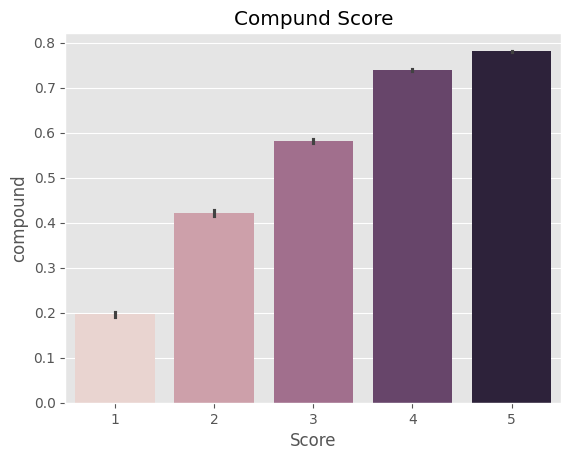

In [39]:
ax = sns.barplot(data=vaders, x='Score', y='compound', hue='Score', legend=False)
ax.set_title('Compund Score')
plt.show()

"Compound Score" bar plot shows the relationship of compound scores for each of the five scoring categories. The text's overall sentiment is gauged by the compound score, from 0 to 0.8

Results show that when the scoring category rises, so does the compound score.  Score categories 3 and 4 show the biggest increase in compound score, indicating that the transition from neutral to positive mood is most true in the overall review.

Higher scores are linked to more favorable mood, according to the data, which also shows a positive correlation between the scoring category and the compound score overall. 
Because it is normal for customers to give items or services better ratings after having a favorable experience with them, these results are in line with our expectations.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

THis activity allowed me to experiment with sentiment analysis and understand how to use charts to read the analyzed data.with my preprocessing and basic data manipulation I was albe to arrive at the expected results. and explain what the chart meant. Most importantly I learnt that some scores by users might not be a total reflection of the conducted sentiment analysis 

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab5.ipynb** to the **Lab 5 – Sentiment Analysis (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection